In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
# depart = pd.read_csv('/Users/xiaoqisun/Desktop/Seven/Discovery Progam/Oklahoma key_new.csv',names=['Department Name','Acronym'])
# data = pd.read_csv('/Users/xiaoqisun/Desktop/Seven/Discovery Progam/final finished/Oklahoma_State_University Courses 2017-21 Webscraped.csv').merge(right=depart, how='left',left_on='Department Name', right_on='Acronym')
# data = data[['Course Catalogue Number','Department Name_y','Course Name','Course Description','Graduate/Undergraduate','Format','Lab','Academic Catalogue Year','Food Systems','Food Justice/Equity','Critical Pedagogy','Keyword']].rename(columns={'Department Name_y':'Department Name'})
# data.to_csv('Oklahoma combined to upload.csv')


In [5]:
data = pd.read_csv('/Users/xiaoqisun/Desktop/Seven/Discovery Progam/Oklahoma_State_University Courses 2017-21 Webscraped.csv')
data['Keyword'] = data['Keyword'].apply(lambda x: x[1:-1].split(', '))
clean_data = data.explode('Keyword')

In [6]:
clean_data

,Course Catalogue Number,Department Name,Course Name,Course Description,Graduate/Undergraduate,Format,Lab,Academic Catalogue Year,Food Systems,Food Justice/Equity,Critical Pedagogy,Keyword
0,AFAM 4453,African American Studies (AFAM),Black Geographies & Memorialization in the Lan...,How and why have African American people sough...,Undergraduate,Lecture,False,2020-2021,NaN,NaN,NaN,'land'
1,AGIN 5000,Ag International (AGIN),Master's Thesis/Report in International Agricu...,For students working on a masters degree in In...,Graduate,Independent Study,False,2020-2021,NaN,NaN,NaN,'agri'
2,AGIN 5113,Ag International (AGIN),Global Agricultural Development Communications,Role of Information Communication Technologies...,Graduate,Lecture,False,2020-2021,NaN,NaN,NaN,'agri'
3,AGIN 5213,Ag International (AGIN),Global Agricultural Entrepreneurship,Use of entrepreneurship principles to develop ...,Graduate,Lecture,False,2020-2021,NaN,NaN,NaN,'agri'
4,AGIN 5312,Ag International (AGIN),Applied Issues in International Agriculture an...,Applied global issues in international agricul...,Graduate,Lecture,False,2020-2021,NaN,NaN,NaN,' ag '
...,...,...,...,...,...,...,...,...,...,...,...,...
8456,VMED 7871,Veterinary Medicine (VMED),Advanced Equine Reproduction,application of recent research in the breedin...,NaN,NaN,False,2017-2018,NaN,NaN,NaN,'breed'
8457,VMED 7872,Veterinary Medicine (VMED),"Special Surgical Problems and Techniques, Ad...",surgical management of small animal orthopedi...,NaN,NaN,False,2017-2018,NaN,NaN,NaN,' animal'
8458,VMED 7891,Veterinary Medicine (VMED),Equine Surgical Laboratory,niques directly supervised by the instructor. ...,NaN,NaN,False,2017-2018,NaN,NaN,NaN,' animal'
8459,VMED 7933,Veterinary Medicine (VMED),Diagnostics,"in animal necropsy, clinical pathology, clini...",NaN,NaN,False,2017-2018,NaN,NaN,NaN,' animal'


In [7]:
# frequency of top 50 keywords
frequency_top50 = clean_data['Keyword'].value_counts().to_frame().head(50)
frequency_top50

,Keyword
'agri',1710
'land',1310
' animal',1248
'food',944
' nutri',858
' soil',588
' metaboli',386
'crop',368
' hospitality ',308
' diet',244


In [8]:
# frequency of top 50 keywords in each department
by_department = clean_data[clean_data['Keyword'].isin(frequency_top50.index)].groupby(['Department Name','Keyword']).count()
frequency_in_department = by_department.loc[:,['Course Catalogue Number']].rename(columns={'Course Catalogue Number':'Count'})
frequency_in_department

Count
Department Name                    Keyword        
Accounting (ACCT)                  'agri'        4
African American Studies (AFAM)    'land'        2
Ag International (AGIN)            'agri'       54
                                   'food'       26
Agricultural Communications (AGCM) 'agri'      224
...                                            ...
Veterinary Medicine (VMED)         'breed'      18
                                   'crop'        4
                                   'food'       56
                                   'fungi'       8
                                   'gastro'      8

[447 rows x 1 columns]

In [9]:
# top keyword in each department
by_department_fullkeywords = clean_data.groupby(['Department Name','Keyword']).count().loc[:,['Course Catalogue Number']].rename(columns={'Course Catalogue Number':'Count'})
by_department_fullkeywords_reset = by_department_fullkeywords.reset_index()
top_key_dep = by_department_fullkeywords_reset.sort_values('Count').groupby('Department Name').last()
top_key_dep

,Keyword,Count
Department Name,,
Accounting (ACCT),'agri',4
African American Studies (AFAM),'land',2
Ag International (AGIN),'agri',54
Agricultural Communications (AGCM),'agri',224
Agricultural Economics (AGEC),'agri',424
...,...,...
Theatre (TH),'land',6
University (UNIV),' oat',4
Veterinary Biomedical Sciences (VBSC),' animal',68


In [10]:
#distribution of top 10 
top3_department = by_department_fullkeywords_reset.groupby('Department Name').sum().sort_values('Count',ascending=False).head(3)
top3_department


,Count
Department Name,
Animal Science (ANSI),1744
Nutritional Sciences (NSCI),1232
Horticulture (HORT),692


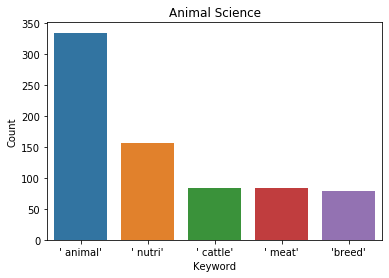

In [15]:

# ANSI
plt.figure
Animal_Science = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department Name']=='Animal Science (ANSI)'].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keyword',y='Count' ,data=Animal_Science)
plt.title('Animal Science');

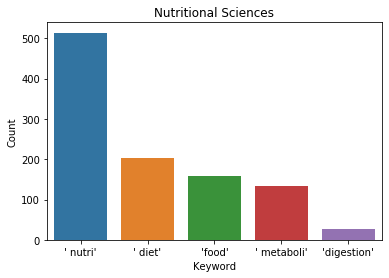

In [16]:
# NSCI
plt.figure
NSCI = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department Name']=='Nutritional Sciences (NSCI)'].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keyword',y='Count' ,data=NSCI)
plt.title('Nutritional Sciences');

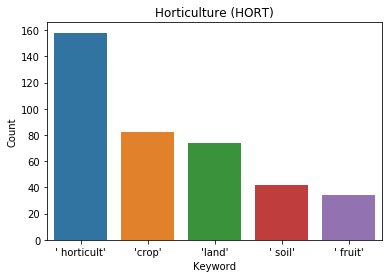

In [17]:

# HORT
plt.figure
HORT = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department Name']=='Horticulture (HORT)'].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keyword',y='Count' ,data=HORT)
plt.title('Horticulture (HORT)');

In [14]:
# export
writer = pd.ExcelWriter('/Users/xiaoqisun/Desktop/Seven/Discovery Progam/EDA/Oklahoma State University EDA result.xlsx', engine='xlsxwriter')

frequency_top50.to_excel(writer, sheet_name='top 50 keywords')
frequency_in_department.to_excel(writer, sheet_name='keywords in dep')
top_key_dep.to_excel(writer, sheet_name='top keyword in dep')

writer.save()